# Data Exploration of the IAM Lines Database

This dataset is available on [the website of INF, University of Bern](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database).

>  IAM Handwriting Database 

> The IAM Handwriting Database contains forms of handwritten English text which can be used to train and test handwritten text recognizers and to perform writer identification and verification experiments.

> …

> The database contains forms of unconstrained handwritten text, which were scanned at a resolution of 300dpi and saved as PNG images with 256 gray levels. The figure below provides samples of a complete form, a text line and some extracted words.

> …

> The IAM Handwriting Database 3.0 is structured as follows:

> -    657 writers contributed samples of their handwriting
> -    1,539 pages of scanned text
> -    5,685 isolated and labeled sentences
> -    13,353 isolated and labeled text lines
> -    115,320 isolated and labeled words




## Data Format

This experiment is using the lines format of the original IAM Database.

For convinence I have created an index of the dataset.


In [1]:
import pandas as pd
import sqlite3
from os import path

db_path = path.join('..', 'data', 'iam-database', 'iam_lines.db')
frame = pd.read_sql_query('SELECT * FROM lines_index', sqlite3.connect(db_path))
print ('{:,d} rows.'.format(len(frame)))
frame.head()

13,353 rows.


,line_id,image_path,status,gray_level,tokens
0,a01-000u-00,lines/a01/a01-000u/a01-000u-00.png,ok,154,A MOVE to stop Mr. Gaitskell from
1,a01-000u-01,lines/a01/a01-000u/a01-000u-01.png,ok,156,nominating any more Labour life Peers
2,a01-000u-02,lines/a01/a01-000u/a01-000u-02.png,ok,157,is to be made at a meeting of Labour
3,a01-000u-03,lines/a01/a01-000u/a01-000u-03.png,err,156,M Ps tomorrow . Mr. Michael Foot has
4,a01-000u-04,lines/a01/a01-000u/a01-000u-04.png,ok,157,put down a resolution on the subject


The dataset consists of grayscale images of handwritten text segmented into lines. Each line has a corresponding transcription in plaintext. 

This grayscale image is of dimensions 1533 by 136.
Total number of pixel values is 208488
Transcription: "needs an imaginative architect to"


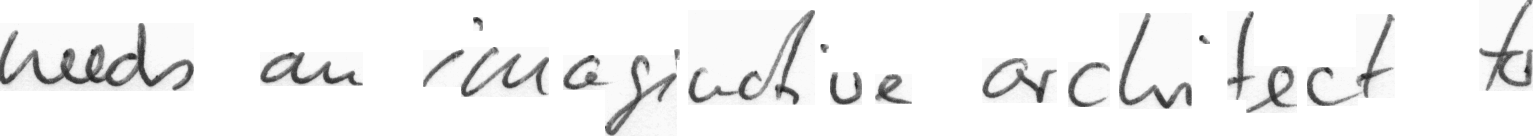

In [2]:
from PIL import Image

image_id = 500
image_path = path.join('..', 'data', 'iam-database', frame.image_path[image_id])
    
image = Image.open(image_path)
print ('This grayscale image is of dimensions %s by %s.' % image.size)
print ('Total number of pixel values is %s' % (image.size[0] * image.size[1]))
print ('Transcription: "%s"' % frame.tokens[image_id])

image

We can threshold the images and convert them to black and white using the provided `gray_level` threshold values.

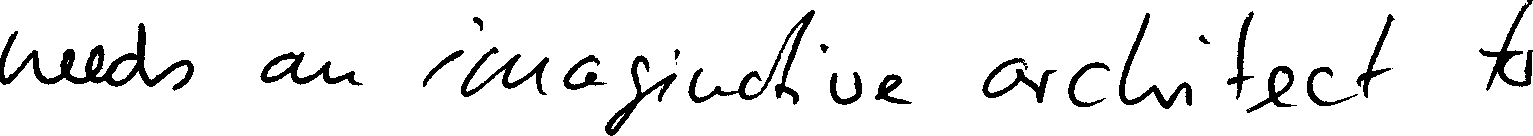

In [3]:
gray_level = frame.gray_level[image_id]
image.point(lambda x: 255 if x > gray_level else 0)

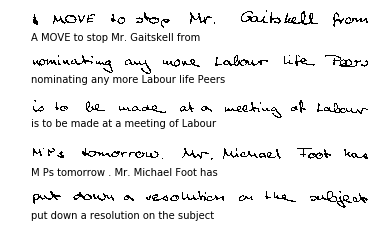

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

figure, axes = plt.subplots(5)
for i in range(5):
    image_path = path.join('..', 'data', 'iam-database', frame.image_path[i])
    gray_level = frame.gray_level[i]

    axes[i].axis('off')
    axes[i].imshow(np.array(Image.open(image_path).point(lambda x: 255 if x > gray_level else 0)) , cmap='gray');
    axes[i].text(-10, 150,  frame.tokens[i]);

The frequency distribution of characters in the dataset is as follows:

In [5]:
from collections import Counter
text = ' '.join(frame.tokens.values.tolist())


counts = pd.DataFrame.from_dict(Counter(text), orient='index').reset_index()
counts = counts.rename(columns={'index': 'character', 0: 'frequency'})
counts.sort_values(by='frequency', ascending=False)

,character,frequency
36,,115368
65,e,56911
8,t,39972
69,a,35849
17,o,33343
40,n,31027
44,i,30300
64,s,27867
70,r,27516
11,h,25244
